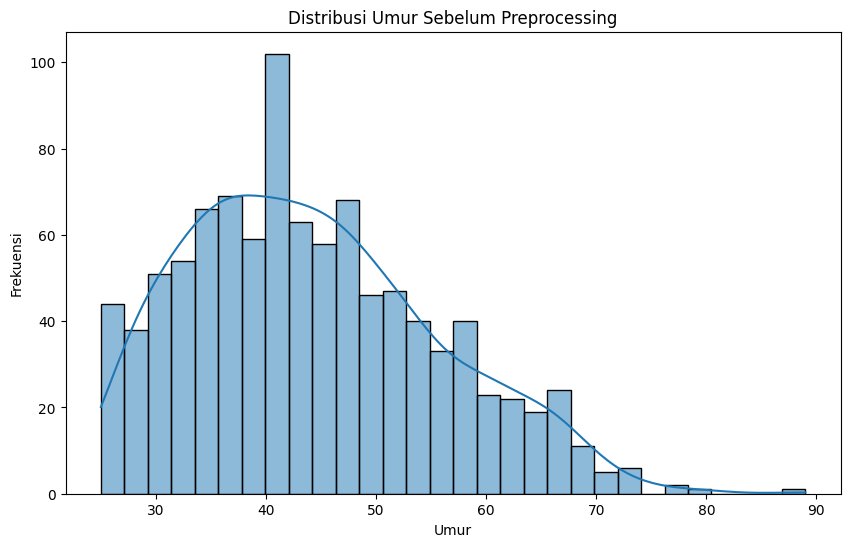

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('bike_buyers.csv')

# Visualize the distribution of 'Age' before preprocessing
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Distribusi Umur Sebelum Preprocessing')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

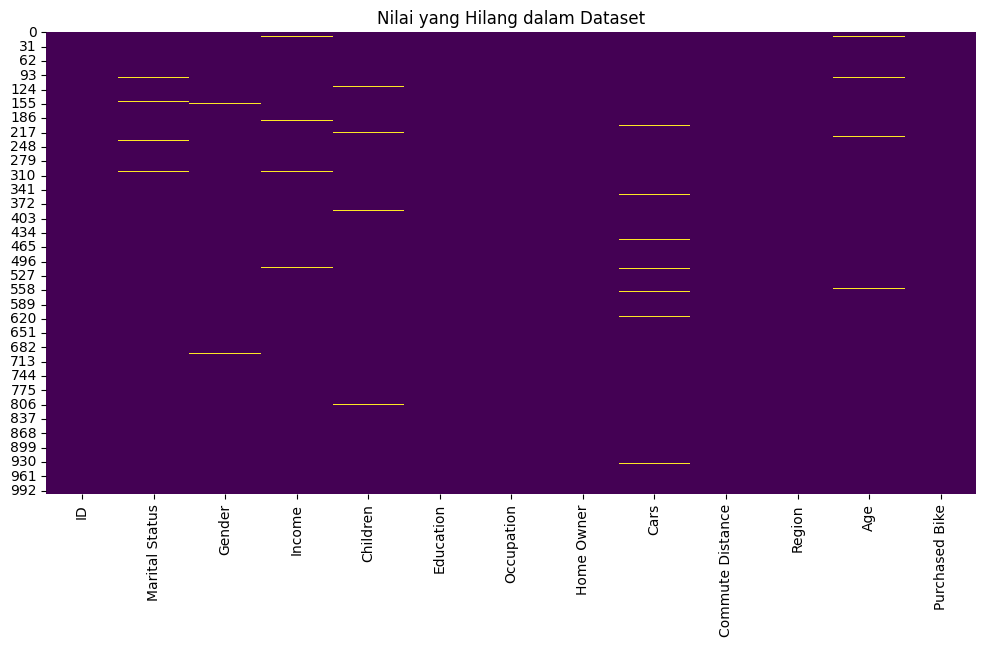

In [7]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Nilai yang Hilang dalam Dataset')
plt.show()

C:\Users\gazag\AppData\Local\Temp\ipykernel_892\1788441908.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Marital Status', data=data_cleaned, palette='viridis')


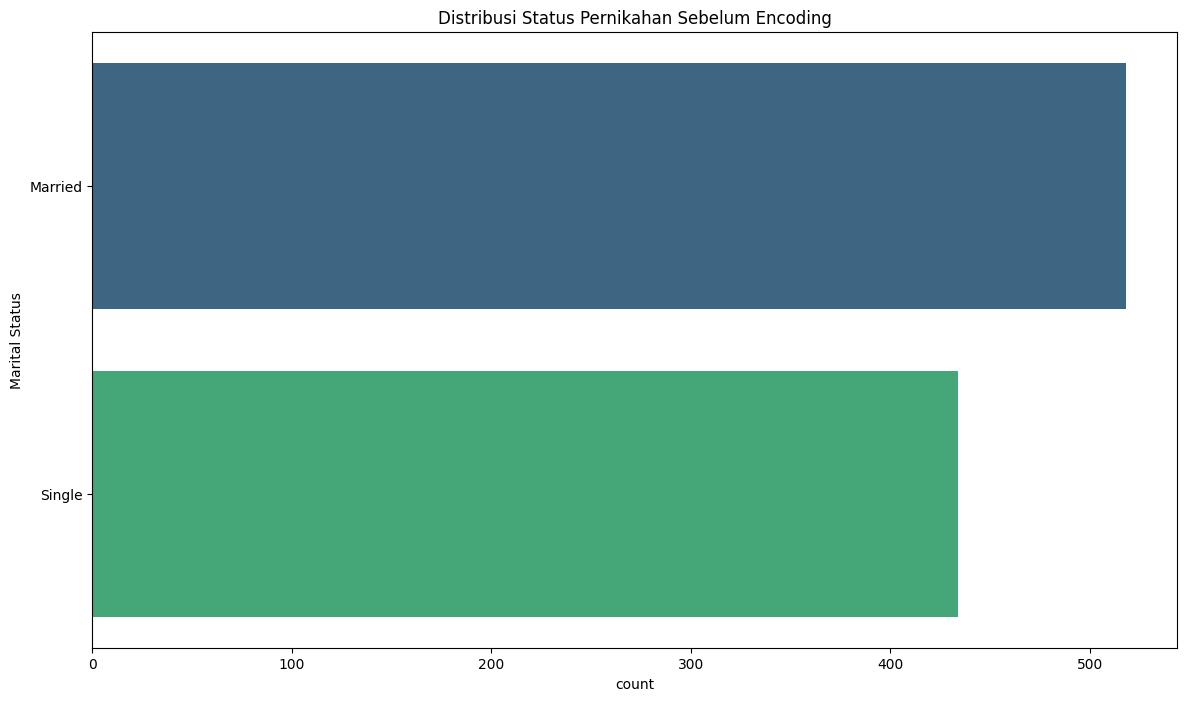

C:\Users\gazag\AppData\Local\Temp\ipykernel_892\1788441908.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Gender', data=data_cleaned, palette='viridis')


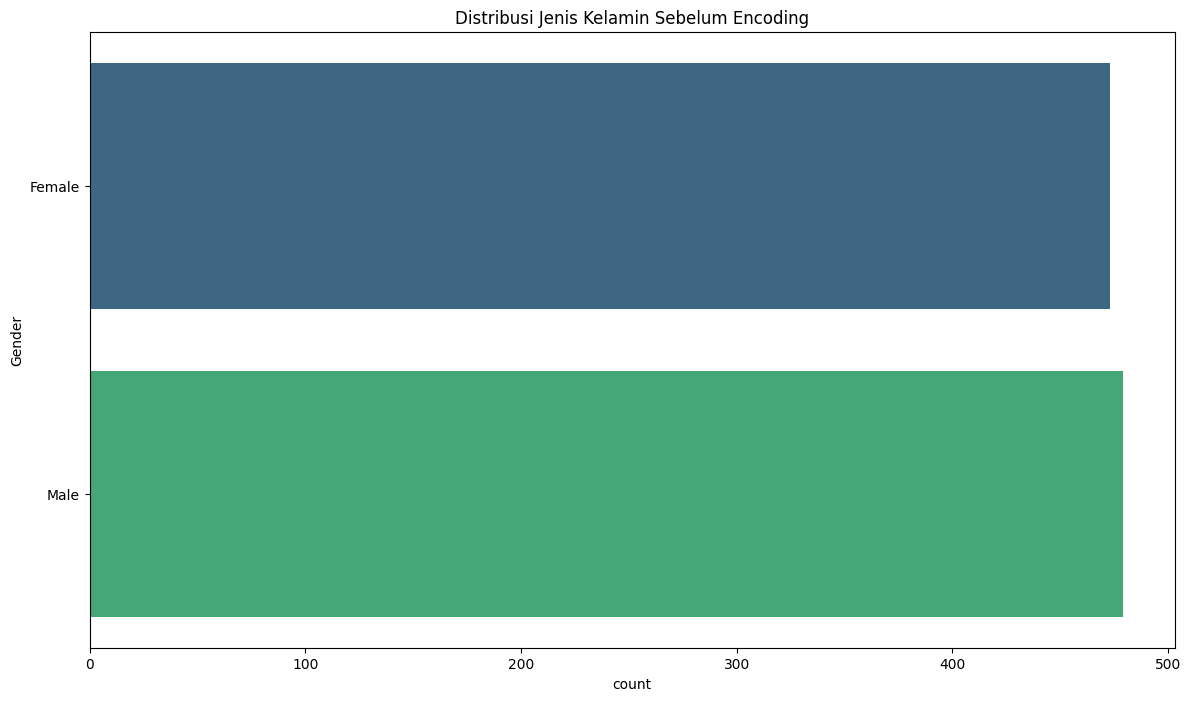

C:\Users\gazag\AppData\Local\Temp\ipykernel_892\1788441908.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Education', data=data_cleaned, palette='viridis')


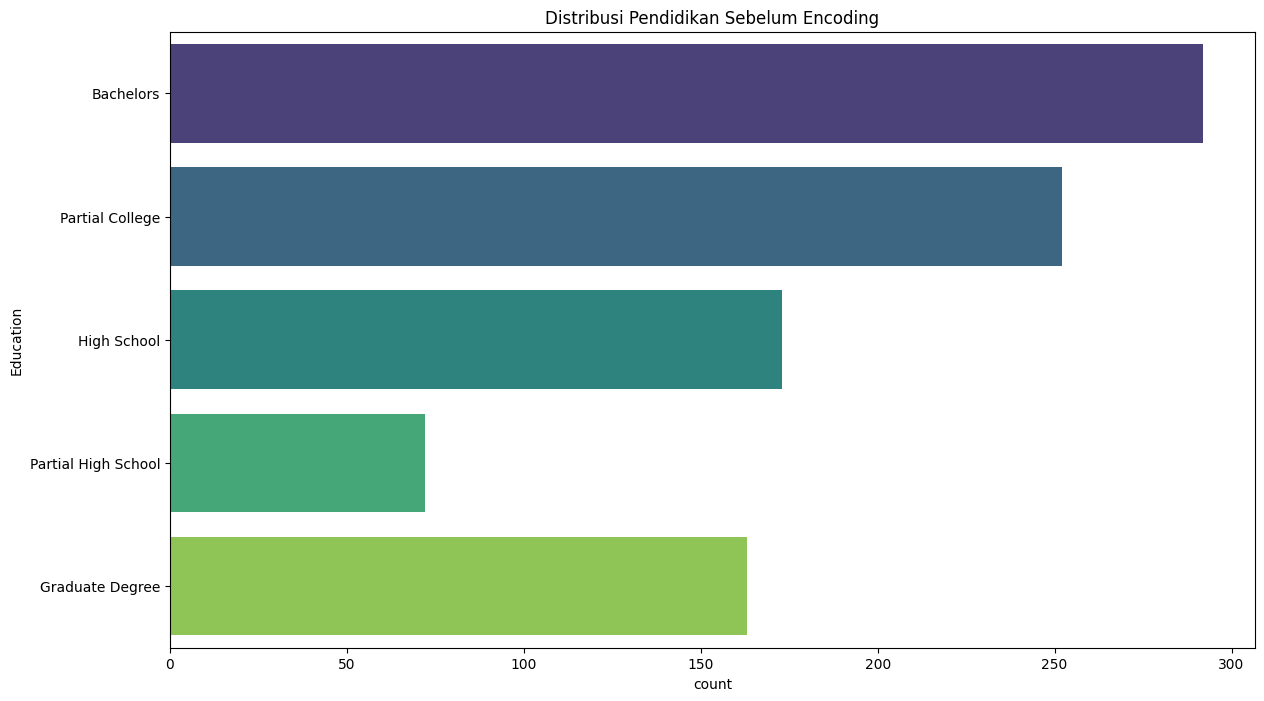

In [8]:
# Drop rows with missing values
data_cleaned = data.dropna()

# Visualize count of categorical columns before encoding
plt.figure(figsize=(14, 8))
sns.countplot(y='Marital Status', data=data_cleaned, palette='viridis')
plt.title('Distribusi Status Pernikahan Sebelum Encoding')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(y='Gender', data=data_cleaned, palette='viridis')
plt.title('Distribusi Jenis Kelamin Sebelum Encoding')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(y='Education', data=data_cleaned, palette='viridis')
plt.title('Distribusi Pendidikan Sebelum Encoding')
plt.show()

C:\Users\gazag\AppData\Local\Temp\ipykernel_892\3064531121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col])
C:\Users\gazag\AppData\Local\Temp\ipykernel_892\3064531121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col])
C:\Users\gazag\AppData\Local\Temp\ipykernel_892\3064531121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

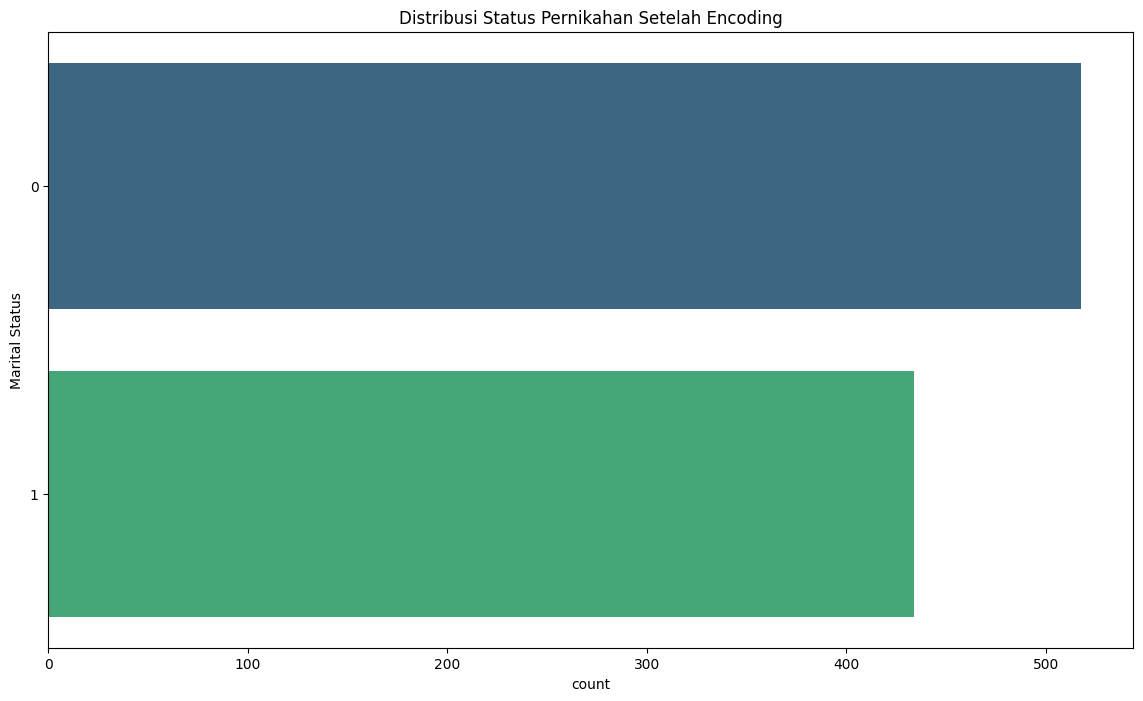

In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoder = LabelEncoder()
categorical_cols = ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region', 'Purchased Bike']
for col in categorical_cols:
    data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col])

# Visualize count of categorical columns after encoding
plt.figure(figsize=(14, 8))
sns.countplot(y='Marital Status', data=data_cleaned, palette='viridis')
plt.title('Distribusi Status Pernikahan Setelah Encoding')
plt.show()

C:\Users\gazag\AppData\Local\Temp\ipykernel_892\1821762885.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[numeric_cols] = scaler.fit_transform(data_cleaned[numeric_cols])


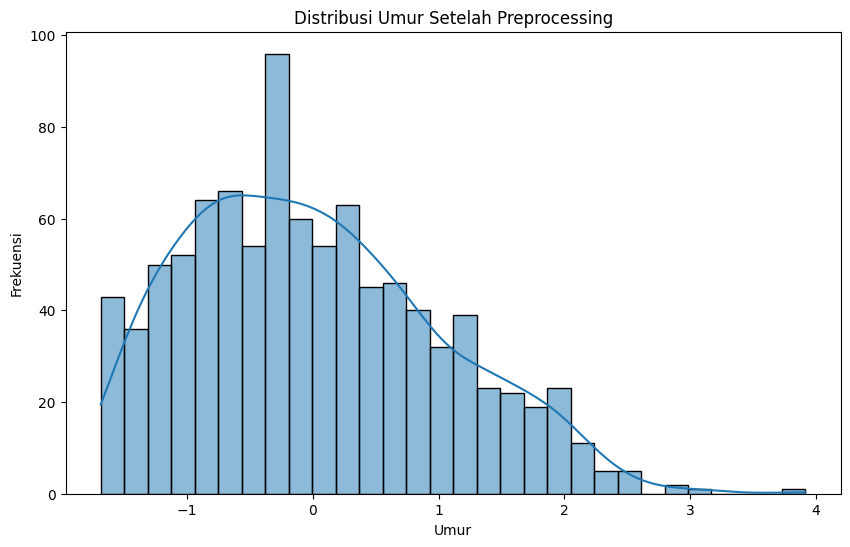

In [10]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
numeric_cols = ['Income', 'Children', 'Cars', 'Age']
data_cleaned[numeric_cols] = scaler.fit_transform(data_cleaned[numeric_cols])

# Visualize the distribution of 'Age' after preprocessing
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Age'], kde=True, bins=30)
plt.title('Distribusi Umur Setelah Preprocessing')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

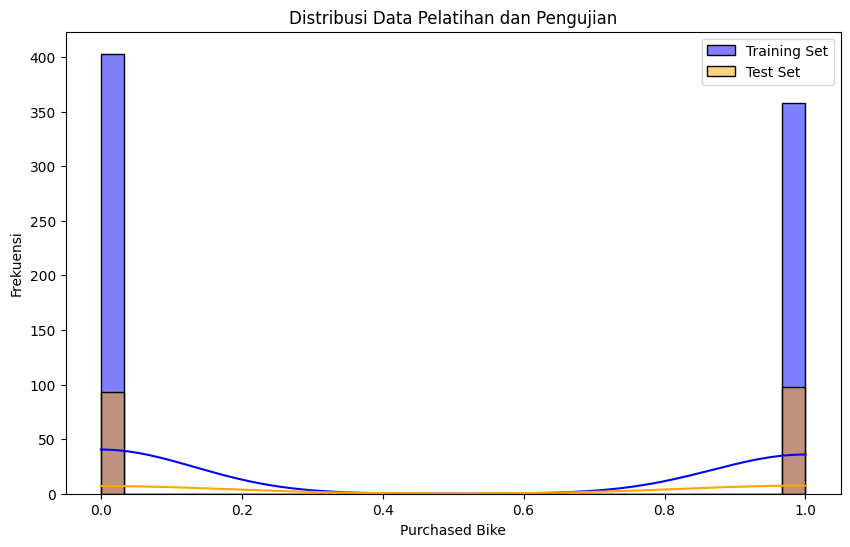

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the distribution of training and test data
plt.figure(figsize=(10, 6))
sns.histplot(y_train, kde=True, bins=30, color='blue', label='Training Set')
sns.histplot(y_test, kde=True, bins=30, color='orange', label='Test Set')
plt.title('Distribusi Data Pelatihan dan Pengujian')
plt.xlabel('Purchased Bike')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

In [11]:
# Separate features and target
X = data_cleaned.drop(['ID', 'Purchased Bike'], axis=1)
y = data_cleaned['Purchased Bike']

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
from sklearn.preprocessing import normalize
%matplotlib inline

In [2]:
df = pd.read_csv('bike_buyers.csv', sep=',')

In [3]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('bike_buyers.csv')

# Fill missing values (for simplicity, we'll drop rows with missing values)
data = data.dropna()

# Encode categorical columns
label_encoder = LabelEncoder()
categorical_cols = ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region', 'Purchased Bike']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Normalize the data
scaler = StandardScaler()
numeric_cols = ['Income', 'Children', 'Cars', 'Age']
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Separate features and target
X = data.drop(['ID', 'Purchased Bike'], axis=1)
y = data['Purchased Bike']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

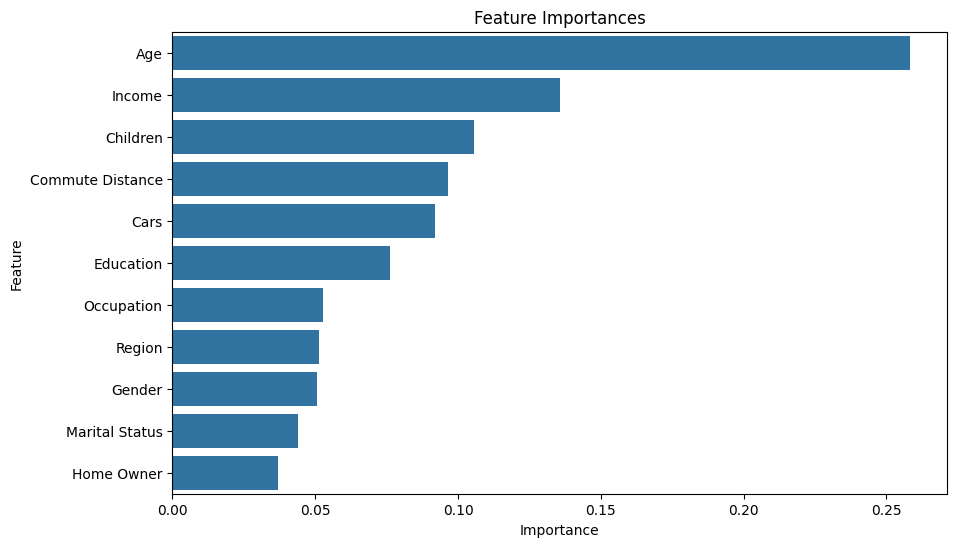

In [16]:
# Extract feature importances
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

In [18]:
import pandas as pd

# Load dataset
data = pd.read_csv('bike_buyers.csv')

# Fill missing values (for simplicity, we'll drop rows with missing values)
data = data.dropna()

# Calculate the mean of the 'Age' attribute
mean_age = data['Age'].mean()
print("Rata-rata umur:", mean_age)

Rata-rata umur: 44.2563025210084


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load dataset
file_path = 'bike_buyers.csv'
data = pd.read_csv(file_path)

# Display first few rows of the dataset
print(data.head())

# Fill missing values if any (for simplicity, we'll drop rows with missing values)
data = data.dropna()

# Encode categorical columns
label_encoder = LabelEncoder()
categorical_cols = ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region', 'Purchased Bike']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Normalize the data
scaler = StandardScaler()
numeric_cols = ['Income', 'Children', 'Cars', 'Age']
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Display processed data
print(data.head())

      ID Marital Status  Gender   Income  Children        Education  \
0  12496        Married  Female  40000.0       1.0        Bachelors   
1  24107        Married    Male  30000.0       3.0  Partial College   
2  14177        Married    Male  80000.0       5.0  Partial College   
3  24381         Single     NaN  70000.0       0.0        Bachelors   
4  25597         Single    Male  30000.0       0.0        Bachelors   

       Occupation Home Owner  Cars Commute Distance   Region   Age  \
0  Skilled Manual        Yes   0.0        0-1 Miles   Europe  42.0   
1        Clerical        Yes   1.0        0-1 Miles   Europe  43.0   
2    Professional         No   2.0        2-5 Miles   Europe  60.0   
3    Professional        Yes   1.0       5-10 Miles  Pacific  41.0   
4        Clerical         No   0.0        0-1 Miles   Europe  36.0   

  Purchased Bike  
0             No  
1             No  
2             No  
3            Yes  
4            Yes  
      ID  Marital Status  Gender    In

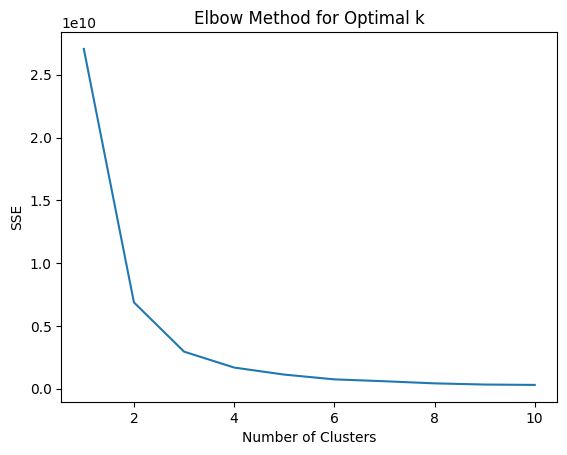

In [11]:
# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# Plot the SSE for each k
plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

In [12]:
# Applying KMeans with the optimal number of clusters
optimal_k = 4  # Misalnya hasil dari metode Elbow adalah 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data)

# Add cluster labels to the data
data['Cluster'] = clusters

# Display data with cluster labels
print(data.head())

      ID  Marital Status  Gender    Income  Children  Education  Occupation  \
0  12496               0       0 -0.515853 -0.554534          0           4   
1  24107               0       1 -0.840219  0.680358          3           0   
2  14177               0       1  0.781615  1.915250          3           3   
4  25597               1       1 -0.840219 -1.171980          0           0   
5  13507               0       0 -1.488953  0.062912          3           2   

   Home Owner      Cars  Commute Distance  Region       Age  Purchased Bike  \
0           1 -1.307144                 0       0 -0.197537               0   
1           1 -0.407360                 0       0 -0.109988               0   
2           0  0.492424                 3       0  1.378346               0   
4           0 -1.307144                 0       0 -0.722832               1   
5           1 -1.307144                 1       0  0.502855               0   

   Cluster  
0        2  
1        1  
2        2 

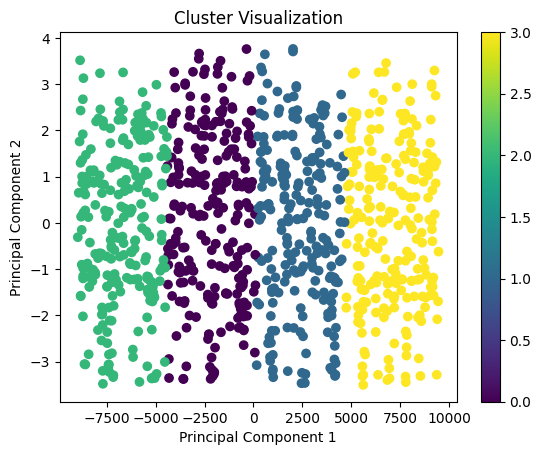

In [13]:
# Visualizing the clusters (we'll use two principal components for visualization)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data.drop('Cluster', axis=1))

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=data['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization')
plt.colorbar()
plt.show()

In [1]:
df["Purchased Bike"].value_counts()

NameError: name 'df' is not defined

In [5]:
df.isna().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [17]:
# import library
from imblearn.over_sampling import SMOTE, RandomOverSampler

from sklearn.preprocessing import OrdinalEncoder

smote = SMOTE(k_neighbors=4)

#smote = RandomOverSampler(sampling_strategy="auto")

x_binary = OrdinalEncoder()

x = x_binary.fit_transform(df)

cols = df.columns

print(cols)

x = pd.DataFrame(x, columns = cols )

print(x)

x_source = x.drop(["ID","Purchased Bike"],axis=1)

print(x_source)

PurchasedBike = x['Purchased Bike']

print(PurchasedBike)

print(PurchasedBike.shape)

# fit predictor and target variable

x_smote, y_smote = smote.fit_resample(x_source, PurchasedBike)

print(x_smote)

y_smote.value_counts()



Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')
        ID  Marital Status  Gender  Income  Children  Education  Occupation  \
0     88.0             0.0     0.0     3.0       1.0        0.0         4.0   
1    727.0             0.0     1.0     2.0       3.0        3.0         0.0   
2    184.0             0.0     1.0     7.0       5.0        3.0         3.0   
3    744.0             1.0     NaN     6.0       0.0        0.0         3.0   
4    804.0             1.0     1.0     2.0       0.0        0.0         0.0   
..     ...             ...     ...     ...       ...        ...         ...   
995  709.0             0.0     1.0     5.0       2.0        2.0         3.0   
996  960.0             1.0     1.0     6.0       4.0        1.0         3.0   
997   54.0             0.0     NaN     5.0       2.0        0.0         4.0   
998  4

ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [49]:
print(x_smote)


NameError: name 'x_smote' is not defined

In [48]:
x_smote.std()

x_smote.std().plot()

NameError: name 'x_smote' is not defined

<AxesSubplot: >

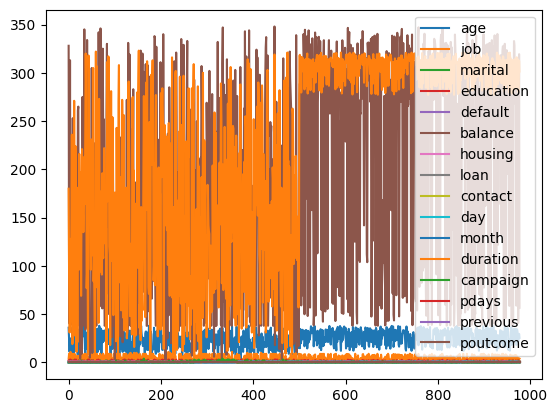

In [9]:
x_smote.plot()

In [11]:
x_smote.value_counts()

age        job       marital   education  default  balance     housing   loan      contact  day       month  duration    campaign  pdays  previous  poutcome
0.000000   1.000000  2.000000  1.000000   0.0      38.000000   1.000000  0.000000  0.0      0.000000  0.0    111.000000  1.000000  0.0    0.0       0.0         1
29.247183  1.357948  1.339487  1.339487   0.0      59.796932   0.339487  0.339487  0.0      0.000000  0.0    303.420524  0.339487  0.0    0.0       0.0         1
29.270576  3.140105  1.000000  1.785026   0.0      274.289843  0.785026  0.785026  0.0      1.000000  0.0    315.504817  0.000000  0.0    0.0       0.0         1
29.322726  5.559091  1.000000  1.688182   0.0      282.666366  1.000000  0.688182  0.0      0.688182  0.0    314.311818  0.000000  0.0    0.0       0.0         1
29.339520  3.447216  1.383024  1.766048   0.0      336.894432  1.000000  0.000000  0.0      0.383024  0.0    314.064192  0.000000  0.0    0.0       0.0         1
                                 

In [12]:
x_smote.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.0,978.000000,978.0,978.000000,978.000000,978.0,978.0,978.0
mean,24.106340,4.044875,1.068882,1.330881,0.005112,184.855647,0.793956,0.157650,0.0,0.367288,0.0,223.505063,0.335175,0.0,0.0,0.0
std,8.710202,3.098694,0.508509,0.663323,0.071355,111.193644,0.355710,0.325719,0.0,0.428741,0.0,101.391603,0.615001,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
25%,17.000000,1.000000,1.000000,1.000000,0.000000,69.374477,0.696189,0.000000,0.0,0.000000,0.0,129.250000,0.000000,0.0,0.0,0.0
50%,24.000000,4.000000,1.000000,1.000000,0.000000,188.500000,1.000000,0.000000,0.0,0.072710,0.0,281.156239,0.000000,0.0,0.0,0.0
75%,32.015617,7.000000,1.071582,1.847776,0.000000,290.043516,1.000000,0.000000,0.0,0.916114,0.0,311.729211,0.628948,0.0,0.0,0.0
max,39.000000,11.000000,2.000000,3.000000,1.000000,348.000000,1.000000,1.000000,0.0,1.000000,0.0,323.000000,4.000000,0.0,0.0,0.0
